# Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview



In [121]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [122]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn 
#cung cấp các lớp mạng neural sẵn có trong PyTorch, như các lớp kết nối đầy đủ (fully connected layers), 
#lớp tích chập (convolutional layers), và các lớp khác.
import torch.nn.functional as F
#Nhập các hàm kích hoạt (activation functions)
#và các hàm liên quan đến mạng neural, như hàm ReLU, softmax, và hàm mất mát.
import torch.optim as optim
#huấn luyện trọng số
import torchvision
import torchvision.transforms as transforms
#Nhập các phép biến đổi (transformations) giúp xử lý và chuẩn hóa dữ liệu hình ảnh trước khi đưa vào mô hình.
#Ví dụ: chuyển đổi hình ảnh thành tensor, chuẩn hóa giá trị pixel, xoay, cắt, hoặc lật ảnh.
from torch.autograd import Variable
#một lớp trong PyTorch cho phép tự động tính toán gradient cho việc tối ưu hóa (sử dụng autograd)
import numpy as np
from sklearn.model_selection import train_test_split

In [123]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

In [124]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [125]:
batch_size = 16

In [126]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)
#tải giữ liệu theo từng batch (mỗi batch có x, y)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

## Hiển thị một vài ví dụ

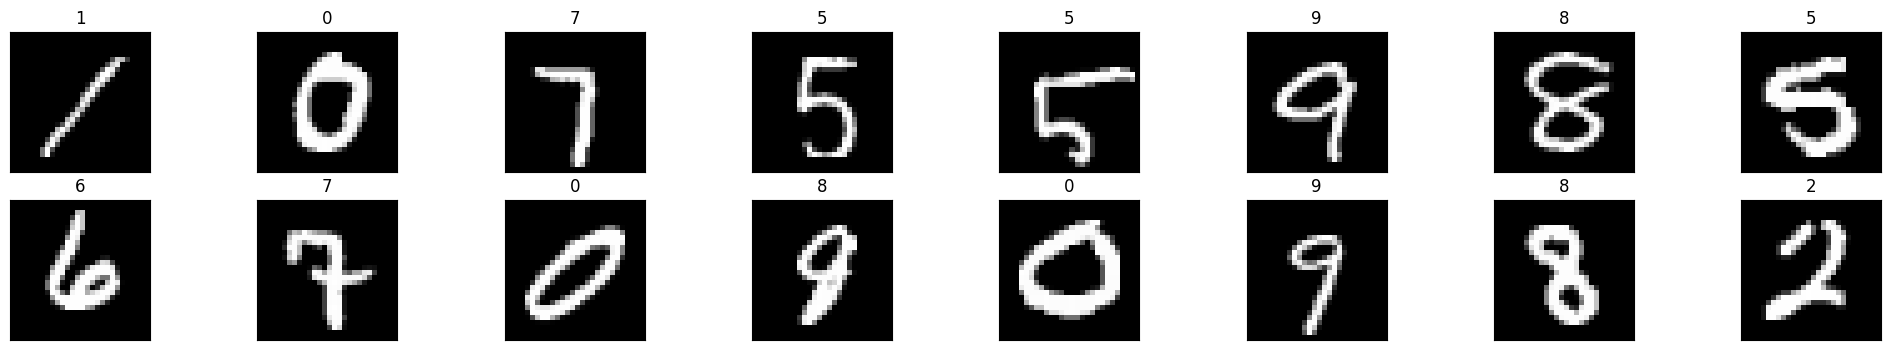

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [128]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1) #numberfeatures x neuron of hiddden layer 11
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)

    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
)


In [129]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max và neg cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#Sử dụng bộ tối ưu hóa Stochastic Gradient Descent (SGD)
# để cập nhật tham số của mô hình dựa trên gradient tính toán từ loss function.

In [130]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            if len(labels.shape)>0:
                total += labels.shape[0]
            else:
                total +=1
            correct += (predicted == labels).sum().item()

    return correct/total
print(labels.shape)

torch.Size([16])


In [131]:
losses = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.963
Finished Training


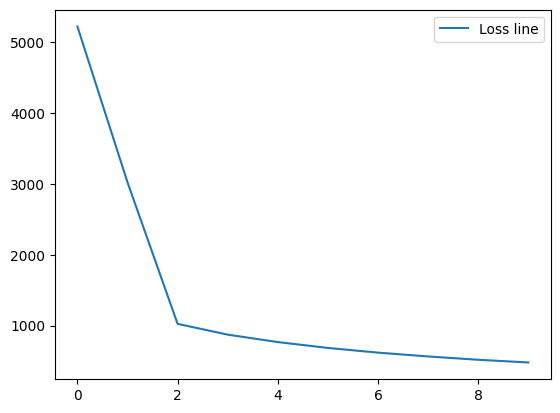

In [132]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
losses_test = []

plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.



In [133]:
losses = []
accuracies =[]
for epoch in range(9, 149, 10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    accuracies.append(accuracy())
    print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.965
Iteration: 20, accuracy: 0.964
Iteration: 30, accuracy: 0.967
Iteration: 40, accuracy: 0.970
Iteration: 50, accuracy: 0.969
Iteration: 60, accuracy: 0.971
Iteration: 70, accuracy: 0.972
Iteration: 80, accuracy: 0.973
Iteration: 90, accuracy: 0.973
Iteration: 100, accuracy: 0.974
Iteration: 110, accuracy: 0.973
Iteration: 120, accuracy: 0.975
Iteration: 130, accuracy: 0.975
Iteration: 140, accuracy: 0.976
Finished Training


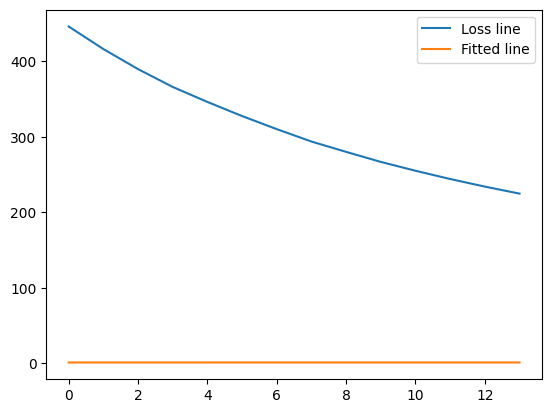

In [134]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
losses_test = []

plt.plot([i for i in range(len(losses))], losses, label='Loss line')
plt.plot([i for i in range(len(accuracies))], accuracies, label='Fitted line')
plt.legend()
plt.show()



*   Hiển thị một số kết quả



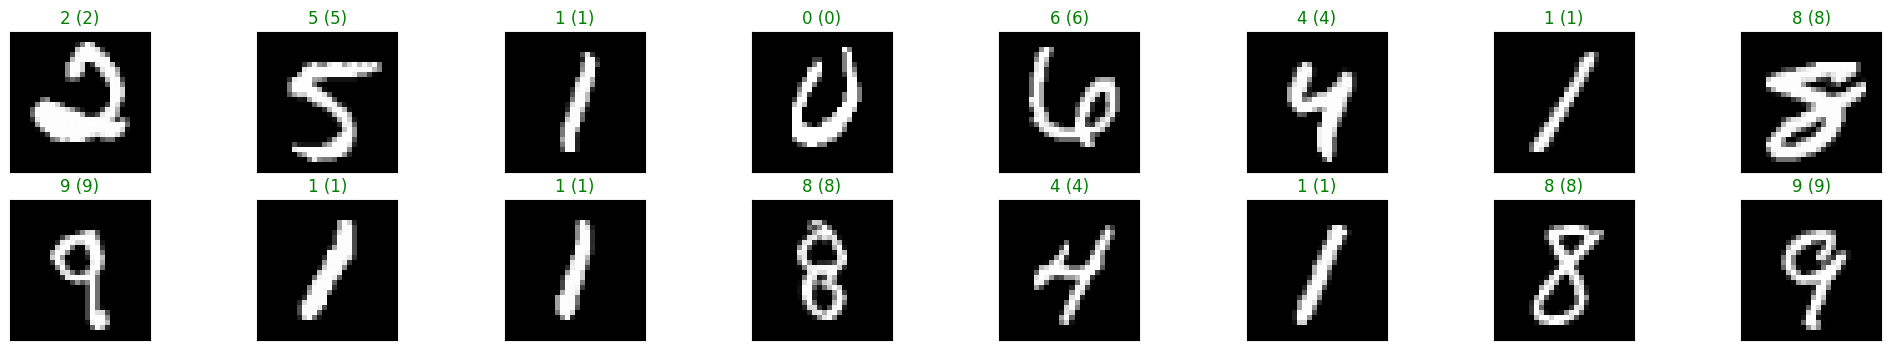

In [135]:
# Obtain one batch of test images
dataiter = iter(testloader)
(images, labels) = next(dataiter)  # Use the correct iterator (dataiter1)

# Get sample outputs
output = model(images)
# Convert output probabilities to predicted class
_, preds = torch.max(output, 1)

# Prep images for display by converting to numpy arrays
images = images.numpy()

# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))  
for idx in np.arange(batch_size):  # Iterate over the correct batch size
    ax = fig.add_subplot(2, int(batch_size / 2), idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                  color=("green" if preds[idx] == labels[idx] else "red"))


## Bài tập

*   Thiết lập thêm 2 mạng nơ ron với số tầng ẩn lần lượt là 3,5 (số lượng nơ ron của các tầng tùy ý). Với mỗi mạng mới được sinh ra, áp dụng learning-rate lần lượt bằng 0.1, 0,05, 0.001 để huấn luyện. Huấn luyện qua khoảng 100 epoch.
*   Chia tập train hiện có thành 2 phần. **85%** dữ liệu làm tập **train**, **15%** còn lại làm tập **dev**. Huấn luyện các mô hình tạo ra ở bước trên với tập **train** mới, sau đó kiểm thử trên tập **dev**. 
* Dùng các model kiểm thử trên tập **test**. So sánh model cho kết quả tốt nhất khi kiểm thử trên 2 tập này và rút ra nhận xét về vai trò của tập **dev**



In [136]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
from torch.utils.data import random_split

trainset = mnist.load_data()
# Split the training data into train and validation (dev) sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

print(x_train.shape)  # Output: (51000, 28, 28)
print(x_test.shape)    # Output: (9000, 28, 28)

# Chuyển đổi sang định dạng float32.
x_train, x_test, y_train, y_test = np.array(x_train, np.float32), np.array(x_test, np.float32), np.array(y_train, np.float32), np.array(y_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

torch.Size([51000, 28, 28])
torch.Size([9000, 28, 28])


In [137]:
batch_size = 16

In [138]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)
#tải giữ liệu theo từng batch (mỗi batch có x, y)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

In [139]:
"""class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 16) #take the input and output for each layer
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 10)
    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28* 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net3 = Net3()
print(net3)

class Net5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 16) #take the input and output for each layer
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 4)
        self.fc4 = nn.Linear(4, 10)
        self.fc5 = nn.Linear(10,10)
    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28* 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
net5 = Net5()
"""

'class Net3(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.fc1 = nn.Linear(28*28, 16) #take the input and output for each layer\n        self.fc2 = nn.Linear(16, 8)\n        self.fc3 = nn.Linear(8, 10)\n    def forward(self, x):\n        # chuyển từ định dạng ma trận thành vector\n        x = x.view(-1, 28* 28)\n        # add hidden layer, with relu activation function\n        x = F.relu(self.fc1(x))\n        x = F.relu(self.fc2(x))\n        x = self.fc3(x)\n        return x\nnet3 = Net3()\nprint(net3)\n\nclass Net5(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.fc1 = nn.Linear(28*28, 16) #take the input and output for each layer\n        self.fc2 = nn.Linear(16, 8)\n        self.fc3 = nn.Linear(8, 4)\n        self.fc4 = nn.Linear(4, 10)\n        self.fc5 = nn.Linear(10,10)\n    def forward(self, x):\n        # chuyển từ định dạng ma trận thành vector\n        x = x.view(-1, 28* 28)\n        # add hidden layer

In [149]:
import torch.optim as optim
import torch

def train_model(net, trainloader, testloader, epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum= 0.9)
    
    # Accuracy function
    def accuracy(testloader):
        correct = 0
        total = 0
        with torch.no_grad():  
            for data in testloader:
                images, labels = data
                outputs = net(images)  
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)  
                correct += (predicted == labels).sum().item() 
        return correct / total

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()  # Zero gradients before each forward pass
            outputs = net(inputs)  # Flatten input for fully connected layers
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()  # Accumulate loss
        
        # Calculate accuracy at the end of each epoch
        epoch_accuracy = accuracy(testloader)
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}, Accuracy: {epoch_accuracy:.4f}')

# Instantiate and train the models
net3 = Net3()
net5 = Net5()

# Example with fewer epochs for testing purposes
train_model(net3, trainloader, testloader, epochs=10, learning_rate=0.01)
train_model(net3, trainloader, testloader, epochs=100, learning_rate=0.05)
train_model(net3, trainloader, testloader, epochs=100, learning_rate=0.001)

train_model(net5, trainloader, testloader, epochs=100, learning_rate=0.1)
train_model(net5, trainloader, testloader, epochs=100, learning_rate=0.05)
train_model(net5, trainloader, testloader, epochs=100, learning_rate=0.001)


Epoch 1, Loss: 2.3029, Accuracy: 0.1004
Epoch 2, Loss: 2.3024, Accuracy: 0.1101
Epoch 3, Loss: 2.3027, Accuracy: 0.1101
Epoch 4, Loss: 2.3025, Accuracy: 0.1070


KeyboardInterrupt: 